In [10]:
import numpy as np
import math
from scipy.linalg import sqrtm
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import pdb


In [63]:
# Compute affinity matrix
def compute_affinity(Ad):
    A = np.zeros((len(Ad), len(Ad))) # Affinity matrix
    for j in range(len(data)):
        for i in range(len(data)):
            if i!=j:
                a = Ad[i]-Ad[j]
                A[i][j] = math.exp((-(np.linalg.norm(a)**2)/2*sigma))
            else:
                A[i][j] = 0
    return A

In [64]:
def diagonal_matrix(A):
    D = np.zeros((len(A), len(A)))
    for i in range(0, len(A)):
        D[i][i]=sum(A[i,:])
    sqrtD = sqrtm(D)
    L = np.linalg.inv(sqrtD) @ A @ np.linalg.inv(D)
    return L, D

In [65]:
def compute_eigenvectors(L, k):
    evev = np.linalg.eig(L)
    evalues = evev[0]
    evectors = evev[1]
    result = []
    ind = 0
    for evalue in evalues:
        result.append(np.linalg.norm(evalue))
    norm_evalues=np.array(result) #Now we have the modulo of evalues
    indexes = norm_evalues.argsort()[-k:][::-1] # Extract k highest values indexes
    V = np.zeros((len(L), k)) # Type of evectors can be complex
    for value in indexes:
        V[:,ind] = evectors[:,value] # Stack the k highest evectors to V
        ind = ind + 1
    return V, result, indexes

In [66]:
def normalize_vectors(V):
    N = np.zeros((len(V), V.shape[1]))
    for col in range(0, V.shape[1]-1):
        vector = V[:,col]
        vector_norm = vector/np.linalg.norm(vector) # Normalize using modulo
        N[:,col] = vector_norm
    return N

In [70]:
def k_means_clustering(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    return kmeans

In [71]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

data = np.genfromtxt("example1.txt", delimiter=",")
G = nx.Graph() # Create graph
G.add_edges_from(data)




In [72]:
# Load data
data = np.genfromtxt("example1.txt", delimiter=",")

# Create graph
G = nx.Graph() 
G.add_edges_from(data)

# Get Adjacency matrix
aux = nx.linalg.graphmatrix.adjacency_matrix(G)
Ad = np.array(aux.todense())

# Create data matrix 
sigma = 1
k = 10 # Number of subsets

In [73]:
# Get diagonal matrix
L, D = diagonal_matrix(Ad)

# Get eigenvectors
V, evalues, indexes = compute_eigenvectors(L, k)

# Do clusterization
kmeans = k_means_clustering(V, k)


Text(0.5, 1.0, '10 Highest Eigenvalues')

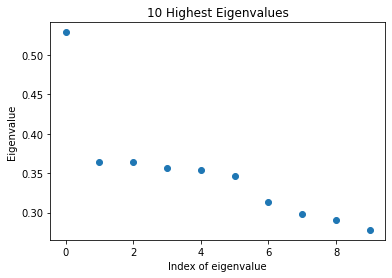

In [75]:
# Plot eigenvalues
k_highest_values = np.take(evalues, indexes)
plt.scatter(range(0, k), k_highest_values)
plt.xlabel("Index of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("{} Highest Eigenvalues".format(k))

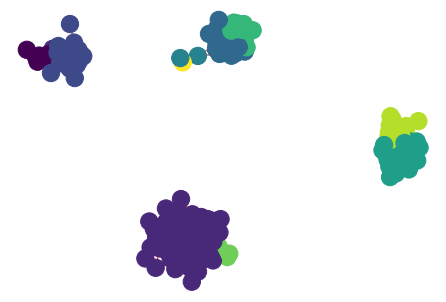

In [76]:
# Draw clustered graph
n_clusters = k
nx.draw(G, node_color=kmeans.labels_, edge_color="red")

In [77]:
clusters = list(range(k))
result=[] # Get cluster id of each node
for id in clusters:
    result.append(np.where(nodes_with_clusters==id))

print(result)

[(array([214, 230, 231, 235, 236, 237, 238]),), (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  21,  22,  23,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 229]),), (array([206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 232, 233, 234, 239,
       240]),), (array([165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 178, 189, 193,
       195, 196, 197, 198, 199, 200, 202, 204, 205]),), (array([177, 180]),), (array(

**ANALYSIS FOR SYNTHETIC GRAPH**

In this part of the laboratory we will analyze a synthetic graph with the functions defined above

In [91]:
# Load data
data = np.genfromtxt("example2.txt", delimiter=",")
data = data[:, 0:2] # Select nodes from dataset

# Create graph
G = nx.Graph() 
G.add_edges_from(data)

# Get Adjacency matrix
aux = nx.linalg.graphmatrix.adjacency_matrix(G)
Ad = np.array(aux.todense())

# Create data matrix 
sigma = 1
k = 2 # Number of subsets

In [92]:
# Get diagonal matrix
L, D = diagonal_matrix(Ad)

# Get eigenvectors
V, evalues, indexes = compute_eigenvectors(L, k)

# Do clusterization
kmeans = k_means_clustering(V, k)


In [93]:
len(evalues)

100

Text(0.5, 1.0, '2 Highest Eigenvalues. SYNTHETIC GRAPH')

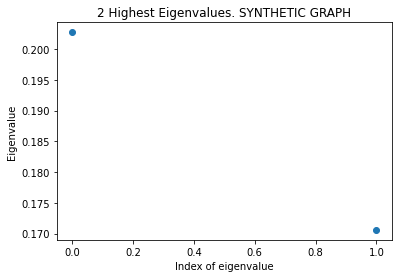

In [94]:
# Plot eigenvalues
k_highest_values = np.take(evalues, indexes)
plt.scatter(range(0, k), k_highest_values)
plt.xlabel("Index of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("{} Highest Eigenvalues. SYNTHETIC GRAPH".format(k))

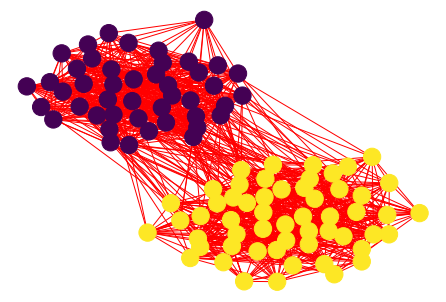

In [95]:
# Draw clustered graph
n_clusters = k
nx.draw(G, node_color=kmeans.labels_, edge_color="red")

In [96]:
clusters = list(range(k))
result=[] # Get cluster id of each node
for id in clusters:
    result.append(np.where(nodes_with_clusters==id))

print(result)

[(array([214, 230, 231, 235, 236, 237, 238]),), (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  21,  22,  23,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 229]),)]
